In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Extract Data
data = pd.read_csv('kmeans_data.txt', sep='  ',names=['x','y'],header=None)
train_data = np.array(data)
print(train_data)

[[-0.65224338 -0.75800961]
 [ 3.8584055   2.0623607 ]
 [-1.6328513   5.3827894 ]
 ...
 [-3.1250826  -4.6770166 ]
 [ 0.94902872  0.3151896 ]
 [-1.0567392   5.3125869 ]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21144\2884576350.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('kmeans_data.txt', sep='  ',names=['x','y'],header=None)


In [3]:
# Defining data
feature_matrix = np.array(data)
print(len(feature_matrix))

1012


In [4]:
# Rbf_kernel
def rbf_kernel(xn, xm, gamma):
    distance = np.linalg.norm(xn - xm)
    return np.exp(-gamma * (distance ** 2))

In [15]:
# Compute n landmarks from the feature matrix
def compute_landmarks(feature_matrix, num_landmarks):
    # Select num_landmarks random indices from the feature matrix without replacement
    random_indices = random.sample(range(len(feature_matrix)), num_landmarks)
    landmarks = [feature_matrix[i] for i in random_indices]
    
    print("Landmarks:", landmarks)
    return landmarks

In [16]:
# Find Phi_value of each train_input
def compute_new_feature(feature_matrix,landmarks):
    feature_vector = []
    for x_value in feature_matrix:
        phi_x_value = []
        for landmark in landmarks:
            k_value = rbf_kernel(x_value,landmark,0.1)
            phi_x_value.append(k_value)
        feature_vector.append(phi_x_value)
    return feature_vector

In [17]:
# Function to calculate Euclidean distance
def euclidean_distance(point, centroid):
    return np.sqrt(sum((point - centroid) ** 2))

Landmarks: [array([ 1.5118994, -4.9840642]), array([ 0.88455892, -0.46642847])]
(1012, 2)


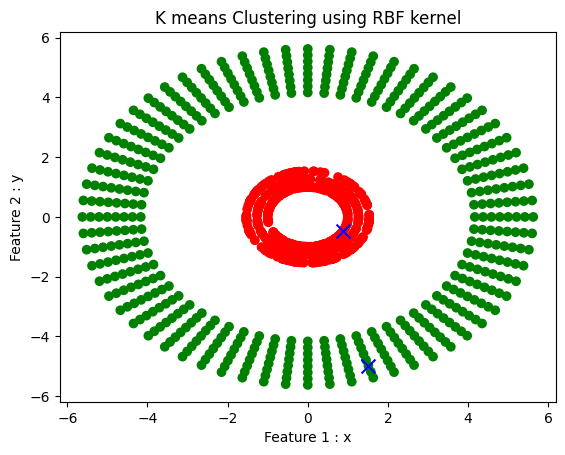

Landmarks: [array([-0.10207686, -1.5299318 ]), array([5.5169172, 1.0973831])]
(1012, 2)


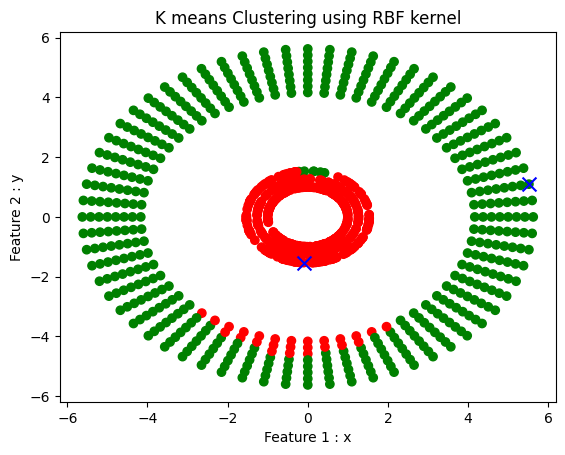

Landmarks: [array([-4.3539332 , -0.42882499]), array([4.4096063, 2.3569837])]
(1012, 2)


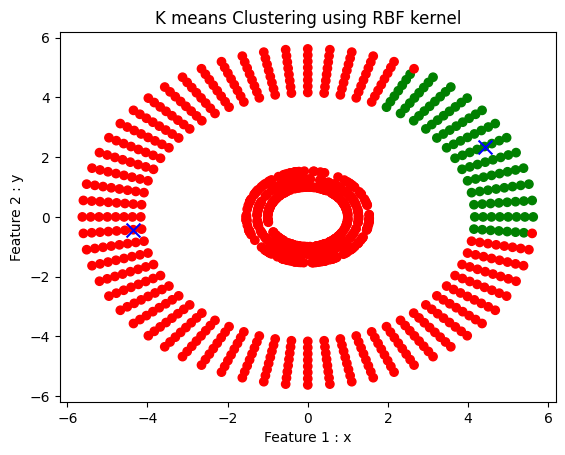

Landmarks: [array([0.89984844, 0.43620269]), array([ 0.45101988, -1.4655007 ])]
(1012, 2)


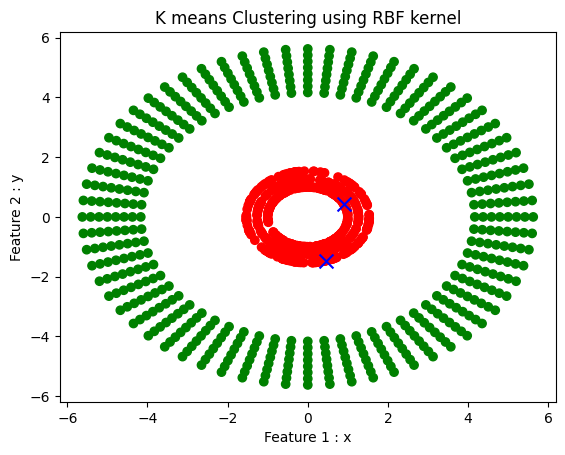

Landmarks: [array([-0.72512089,  1.0385779 ]), array([ 3.6828478, -3.6828478])]
(1012, 2)


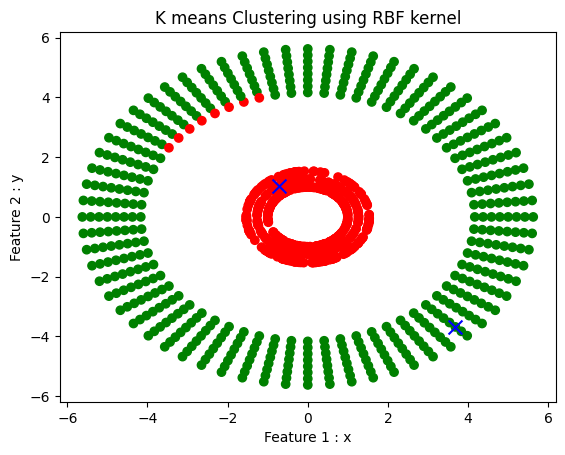

Landmarks: [array([ 1.3304714, -4.3859765]), array([ 1.3783852 , -0.67168834])]
(1012, 2)


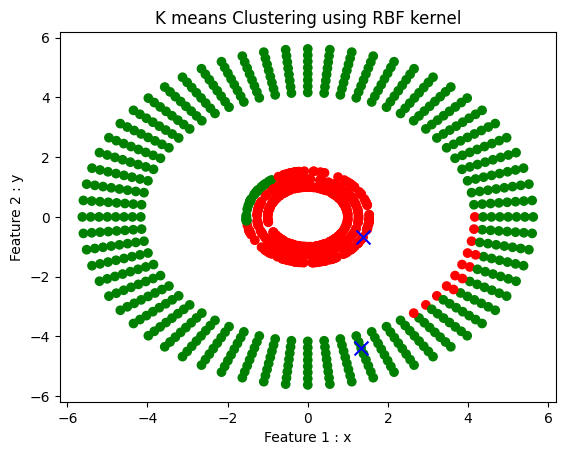

Landmarks: [array([ 0.89416398, -4.4952659 ]), array([-0.9028481 ,  0.88843107])]
(1012, 2)


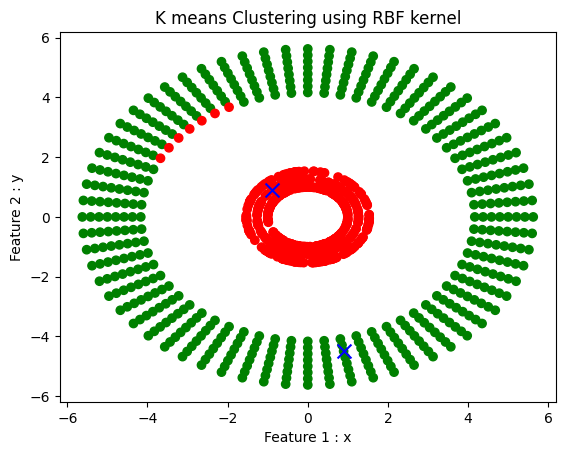

Landmarks: [array([-0.85076652, -0.52554384]), array([-0.65224338, -0.75800961])]
(1012, 2)


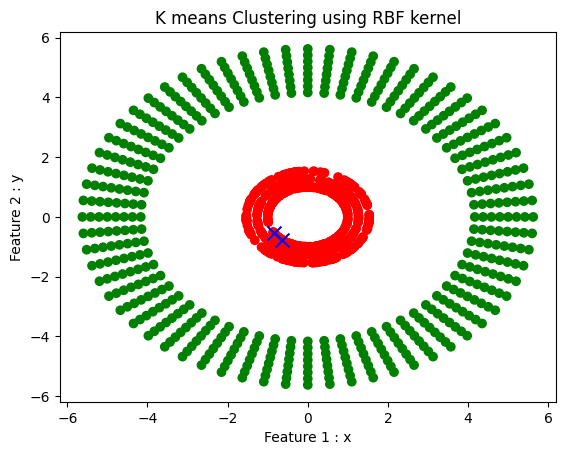

Landmarks: [array([1.2662548 , 0.03229836]), array([4.8118726, 1.9931429])]
(1012, 2)


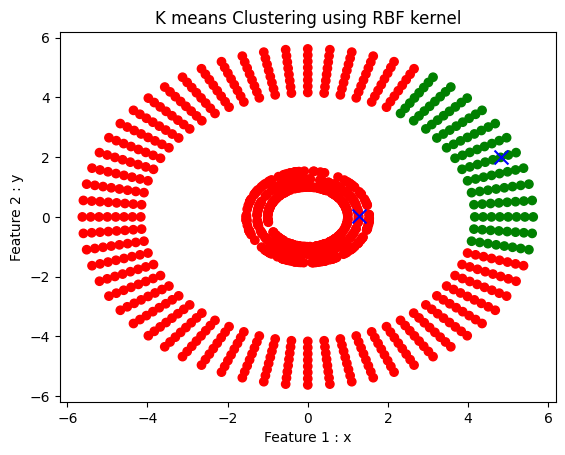

Landmarks: [array([-4.2258727, -2.258776 ]), array([ 3.8109024, -2.5463636])]
(1012, 2)


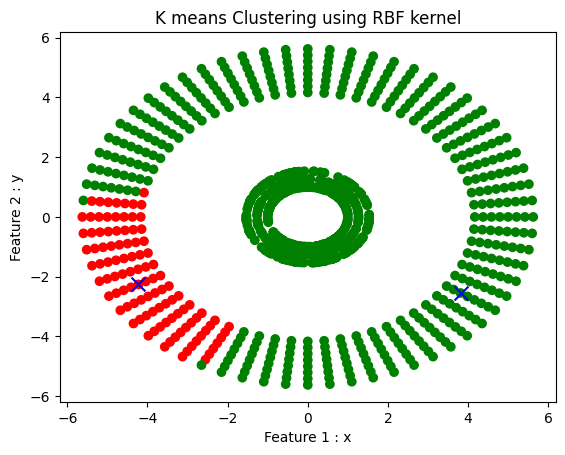

In [22]:
# Running K Means Clustering using RBF Kernels for 10 iteration for different landmarks

for i in range(10):

    num_landmarks = 2
    landmarks = compute_landmarks(feature_matrix,num_landmarks)
    transformed_feature_matrix = np.array(compute_new_feature(feature_matrix,landmarks))

    #Initialise Centroid
    centroids = [list(transformed_feature_matrix[0]),list(transformed_feature_matrix[1])]
    transform_feature_numpy = np.array(transformed_feature_matrix)
    cluster_id  = []
    print(transformed_feature_matrix.shape)

    # Do k-means
    for i in range(10):
        cluster_id = []
        for data_row in transform_feature_numpy:
        
            distance_1 = euclidean_distance(data_row, np.array(centroids[0]))
            distance_2 = euclidean_distance(data_row, np.array(centroids[1]))
            if distance_1 < distance_2:
                cluster_id.append(0)
            else:
                cluster_id.append(1)
    
        # Divide the data based on cluster IDs
        cluster_0 = []
        cluster_1 = []
        for i,id in enumerate(cluster_id):
            if id == 0:
                cluster_0.append(list(transform_feature_numpy[i]))
            else:
                cluster_1.append(list(transform_feature_numpy[i]))
    
        mean_cluster_1 = np.mean(cluster_0, axis=0)
        mean_cluster_2 = np.mean(cluster_1, axis=0)
        centroids = ([mean_cluster_1,mean_cluster_2])
        # print(mean_cluster_1,mean_cluster_2)

    # Define colors for each cluster
    colors = {0: 'red', 1: 'green'}
    temp = pd.DataFrame(data=data)
    temp['cluster_id'] = cluster_id

    # Create a scatter plot
    plt.scatter(data['x'], data['y'], c=temp['cluster_id'].map(colors))
    # Plot each landmark in the landmarks list
    for landmark in landmarks:
        plt.scatter(landmark[0], landmark[1], marker='x', color='blue', s=100)
    plt.xlabel('Feature 1 : x')
    plt.ylabel('Feature 2 : y')
    plt.title('K means Clustering using RBF kernel')
    plt.show()